In [456]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Reading data and doing some premilinary tasks

In [228]:
df = pd.read_csv('train.csv')

In [229]:
df.drop(labels='PassengerId', axis=1, inplace=True)

In [230]:
df.shape

(891, 11)

In [231]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [233]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [234]:
df.Survived.value_counts() ## It is a balanced dataset

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

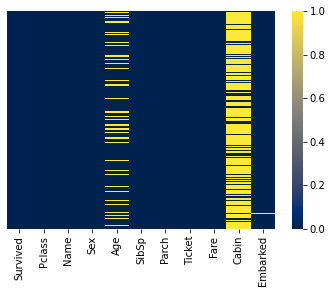

In [235]:
sns.heatmap(df.isnull(), yticklabels=False, cmap=plt.cm.cividis)

## EDA

<AxesSubplot:xlabel='Sex', ylabel='count'>

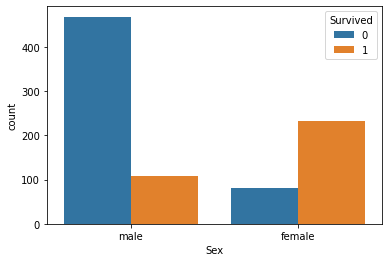

In [236]:
sns.countplot(data=df, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

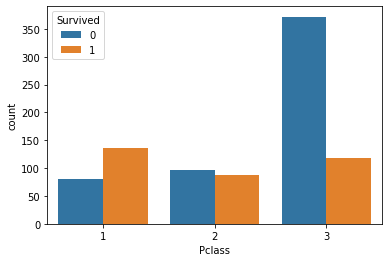

In [237]:
sns.countplot(data=df, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

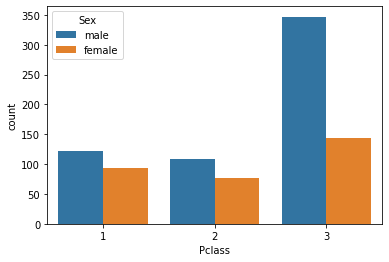

In [238]:
sns.countplot(data=df, x='Pclass', hue='Sex') #We can say that most males died from 3rd class

<AxesSubplot:xlabel='SibSp', ylabel='count'>

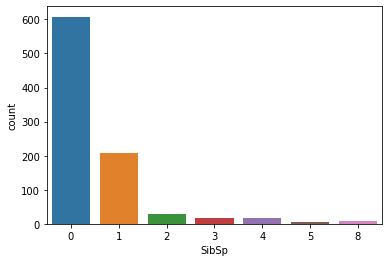

In [239]:
sns.countplot(x=df.SibSp) #Most travelled alone

<AxesSubplot:xlabel='SibSp', ylabel='count'>

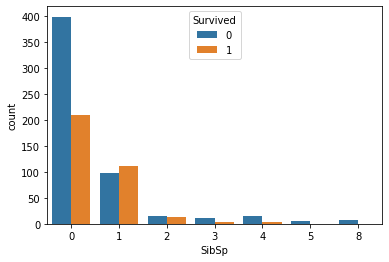

In [240]:
sns.countplot(x=df.SibSp, hue=df.Survived) #Survival rate of alone is more than those with children or wife

<AxesSubplot:xlabel='Embarked', ylabel='count'>

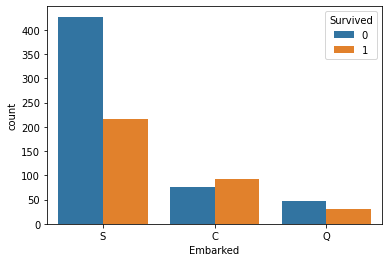

In [241]:
sns.countplot(x=df.Embarked, hue=df.Survived) #From S most people boarded and died

<AxesSubplot:xlabel='Parch', ylabel='count'>

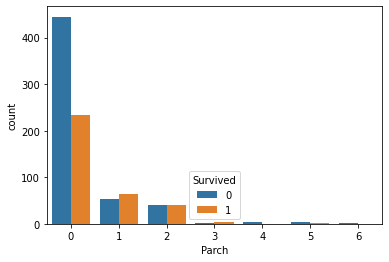

In [242]:
sns.countplot(x=df.Parch, hue=df.Survived)

<AxesSubplot:xlabel='Age', ylabel='Count'>

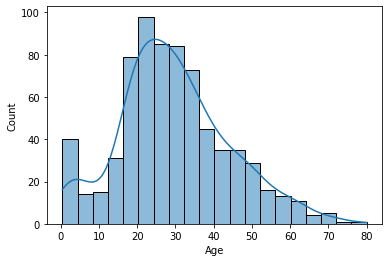

In [243]:
sns.histplot(data=df, x='Age', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

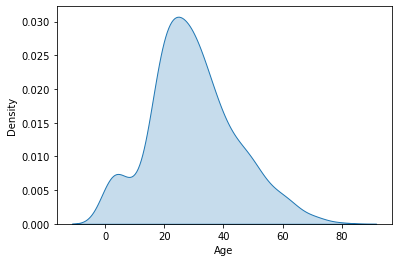

In [244]:
sns.kdeplot(x=df.Age, shade=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

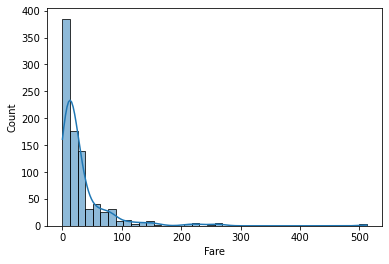

In [245]:
sns.histplot(x=df.Fare, bins=40, kde=True)

<AxesSubplot:>

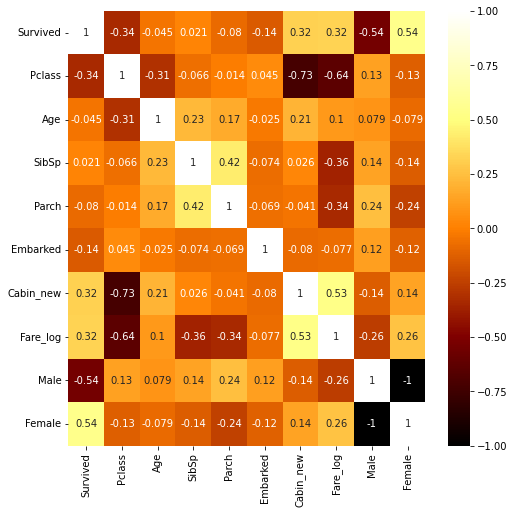

In [421]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), cmap=plt.cm.afmhot, annot=True)

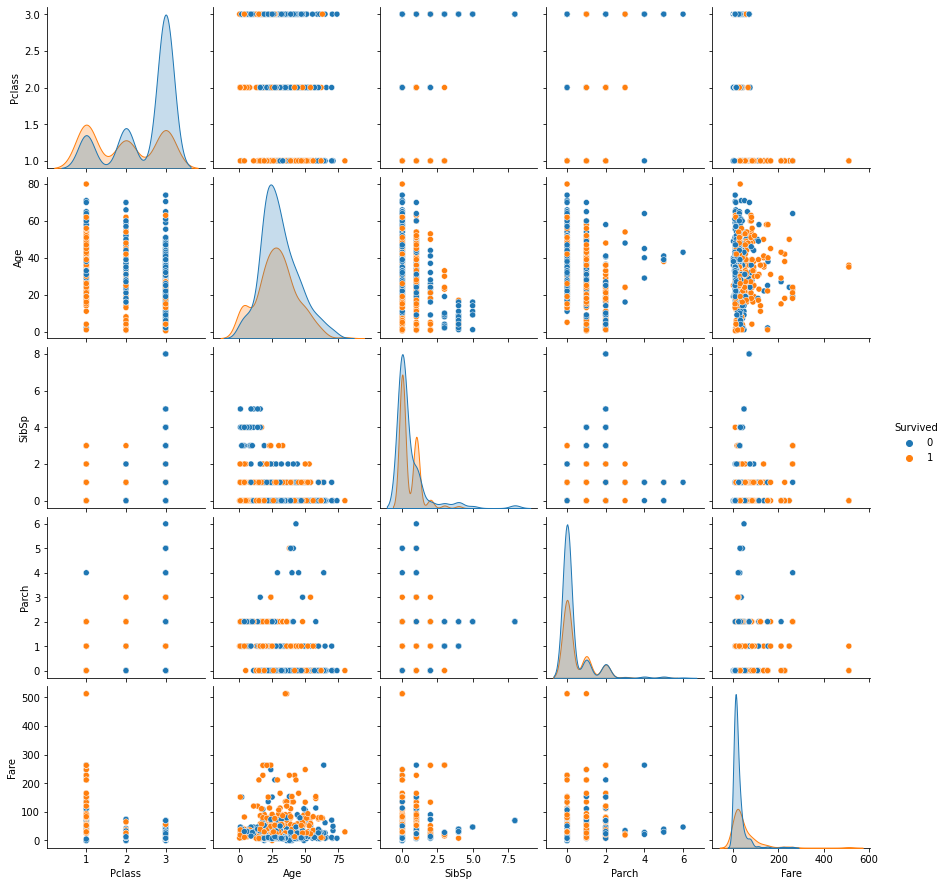

In [246]:
sns.pairplot(data=df, hue='Survived')

## Handling Null Values

#### First Handling Embarked

In [247]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [248]:
df.Embarked.fillna(value='S', inplace=True)

#### Now Let's Handle Age

In [249]:
df.Age.isnull().sum()

177

In [250]:
df.Age.mean()

29.69911764705882

In [251]:
df.Age.median()

28.0

##### HANDLING AGE WITH RANDOM SAMPLE IMPUTATION

In [252]:
Age_sample = pd.Series(df.Age.dropna().sample(df.Age.isnull().sum(), random_state=0))
Age_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [253]:
df[df.Age.isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [254]:
Age_sample.index = df[df.Age.isnull()].index

In [255]:
Age_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [256]:
df.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
836,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S


In [257]:
df.loc[df.Age.isnull(), 'Age']= Age_sample

In [258]:
df.Age.median()

28.0

AGE MEDIAN BEFORE IMPUTATION AND AFTER IMPUTATION IS SAME = 28  

In [259]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### NOW LET'S HANDLE CABIN

In [260]:
df.Cabin.count()/len(df.Cabin) ## Only 22.8% data is present 

0.22895622895622897

Most of the values are missing in Cabin. So I am going to create a new column for Cabin and put 1 where cabin is present else put 0

In [261]:
df['Cabin_new'] = np.where(df['Cabin'].isnull(), 0, 1)

In [262]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       0
Cabin_new      0
dtype: int64

In [263]:
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [264]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


## Handling Outliers

In [265]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [266]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [267]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [268]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [269]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Age'>

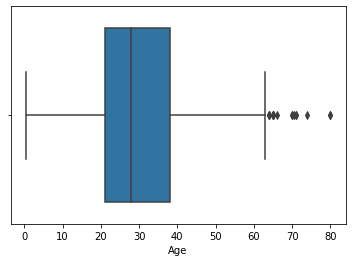

In [270]:
sns.boxplot(x=df.Age)

In [271]:
quantile_1, quantile_3 = np.quantile(df.Age, [0.25,0.75])

In [272]:
quantile_1, quantile_3

(21.0, 38.0)

In [273]:
age_median = df.Age.median()
age_median

28.0

In [274]:
IQR = quantile_3-quantile_1
IQR

17.0

In [275]:
lower_bound = quantile_1 - (1.5*IQR)
upper_bound = quantile_3 + (1.5*IQR)
lower_bound, upper_bound

(-4.5, 63.5)

Any values above 63.5 is an outlier in Age

In [289]:
df.loc[df.Age>63, 'Age']= 63

<AxesSubplot:xlabel='Age'>

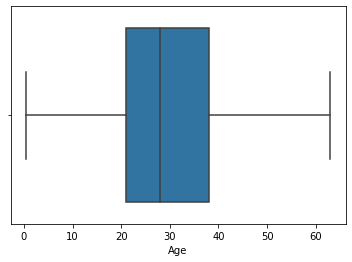

In [291]:
sns.boxplot(x=df.Age)

<AxesSubplot:xlabel='Fare'>

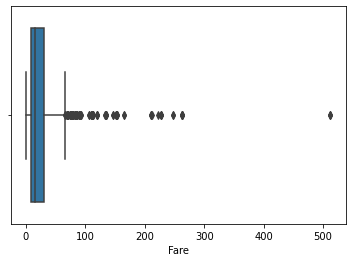

In [276]:
sns.boxplot(x=df.Fare)

In [292]:
quantile_1_Fare, quantile_3_Fare = np.quantile(df.Fare, [0.25,0.75])

In [293]:
quantile_1_Fare, quantile_3_Fare

(7.9104, 31.0)

In [294]:
Fare_median = df.Fare.median()
Fare_median

14.4542

In [296]:
IQR_Fare = quantile_3_Fare-quantile_1_Fare
IQR_Fare

23.0896

In [297]:
lower_bound_Fare = quantile_1_Fare - (1.5*IQR_Fare)
upper_bound_Fare = quantile_3_Fare + (1.5*IQR_Fare)
lower_bound_Fare, upper_bound_Fare

(-26.724, 65.6344)

Any values above 65 is an outlier in Fare

In [298]:
df.loc[df.Fare>65, 'Fare']= 65

In [299]:
df.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,65.0000,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,S,0
5,0,3,"Moran, Mr. James",male,28.00,0,0,8.4583,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,S,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,S,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,S,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,C,0


<AxesSubplot:xlabel='Age'>

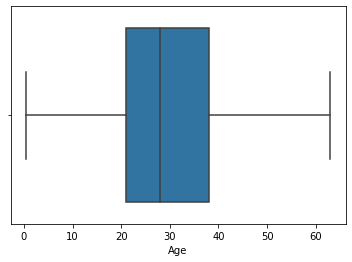

In [300]:
sns.boxplot(x=df.Age)

## Checking Wethere distribution is Gaussian or not

In [301]:
df.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
826,0,3,"Lam, Mr. Len",male,19.0,0,0,56.4958,S,0


### We can check only fare and age to be gaussian or not

<AxesSubplot:xlabel='Fare', ylabel='Count'>

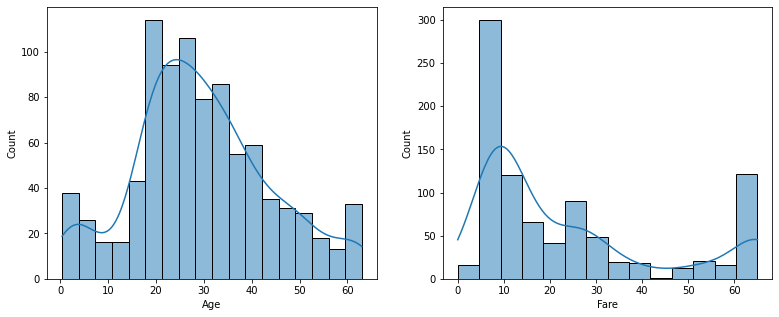

In [309]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(x=df.Age, kde=True)
plt.subplot(1,2,2)
sns.histplot(x=df.Fare, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

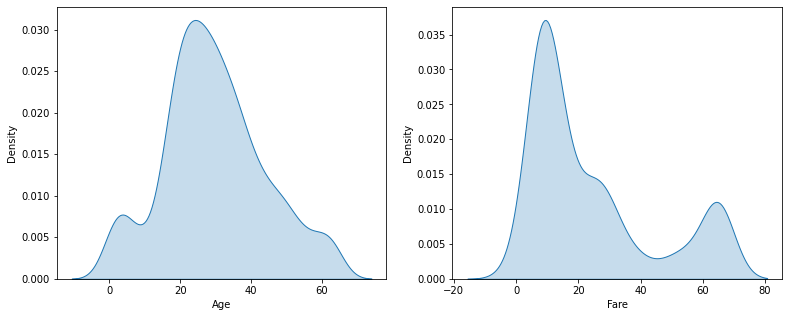

In [310]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.kdeplot(x=df.Age, shade=True)
plt.subplot(1,2,2)
sns.kdeplot(x=df.Fare, shade=True)

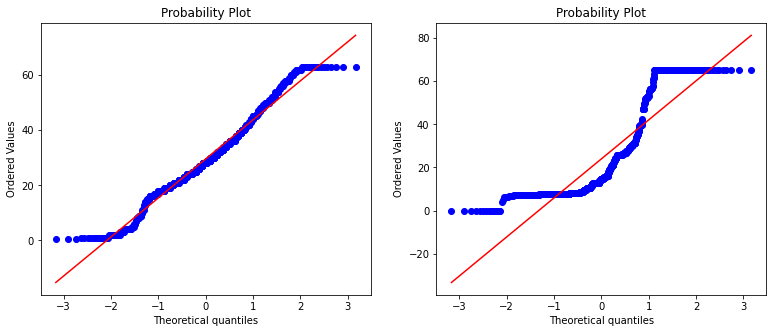

In [335]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
stats.probplot(df.Age, plot=plt)

plt.subplot(1,2,2)
stats.probplot(df.Fare, plot=plt)
plt.show()

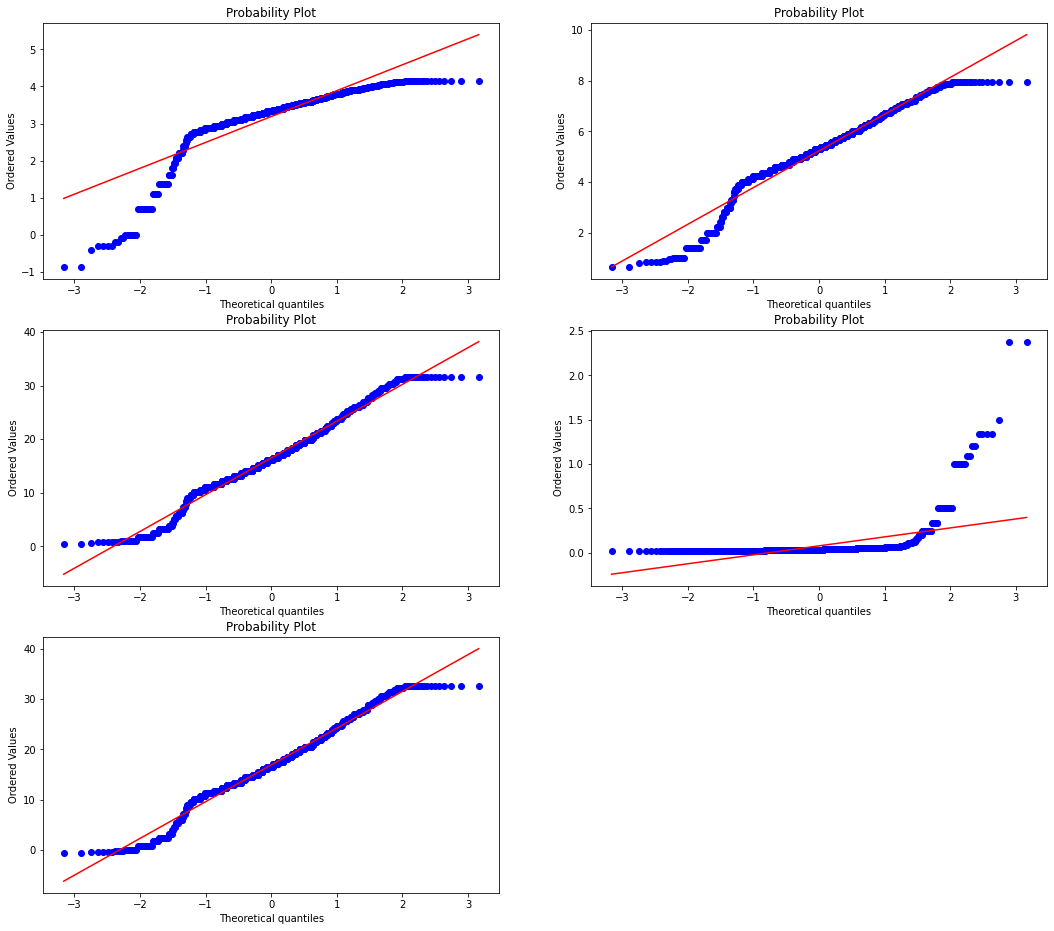

In [343]:
plt.figure(figsize=(18,16))

plt.subplot(3,2,1)
stats.probplot(np.log(df.Age), plot=plt)

plt.subplot(3,2,2)
stats.probplot((df.Age)**(1/2), plot=plt)

plt.subplot(3,2,3)
stats.probplot((df.Age)**(1/(1.2)), plot=plt)

plt.subplot(3,2,4)
stats.probplot(1/(df.Age), plot=plt)

##For BoxCox
plt.subplot(3,2,5)
var,parameters = stats.boxcox(df.Age)
var = pd.Series(data=var)
stats.probplot(var, plot=plt)

plt.show()

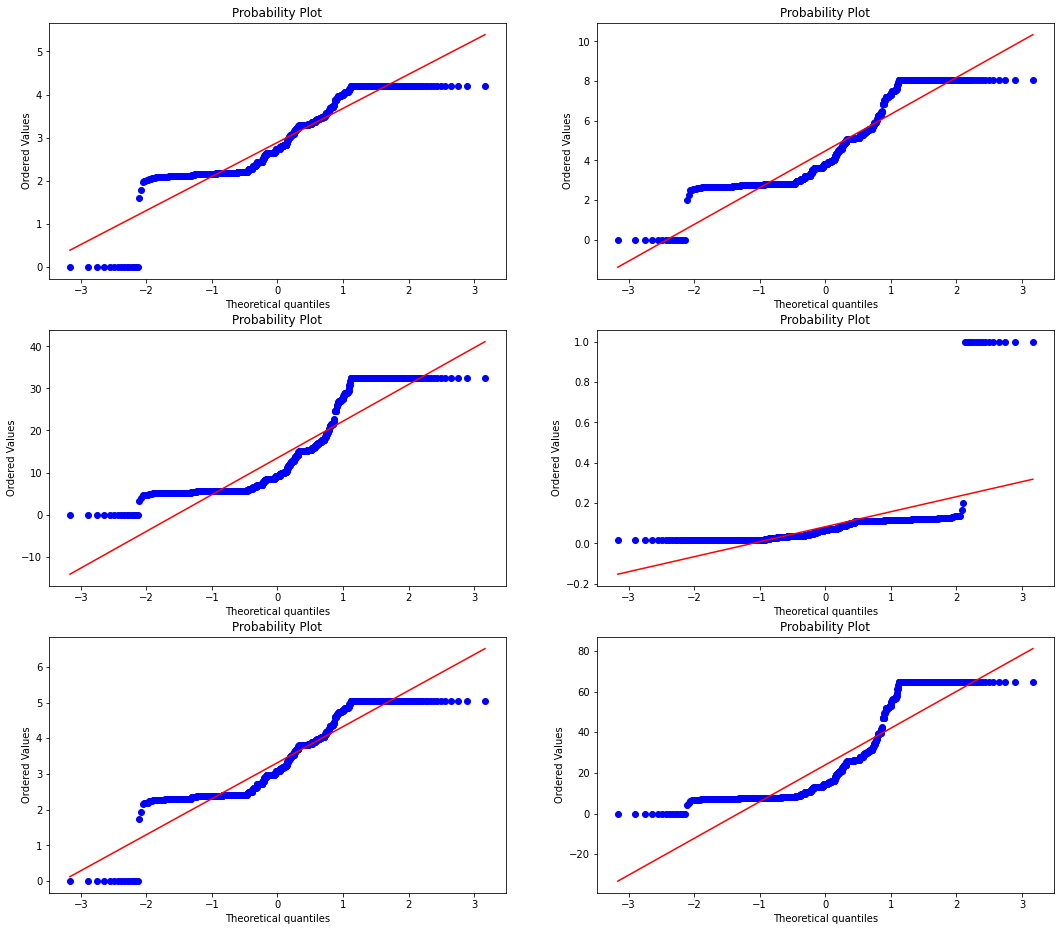

In [355]:
plt.figure(figsize=(18,16))

plt.subplot(3,2,1)
stats.probplot(np.log1p(df.Fare), plot=plt) ##Accepted

plt.subplot(3,2,2)
stats.probplot((df.Fare)**(1/2), plot=plt) ##Rejected

plt.subplot(3,2,3)
stats.probplot((df.Fare)**(1/1.2), plot=plt) ##Rejected

plt.subplot(3,2,4)
stats.probplot(1/(df.Fare+1), plot=plt) ##Rejected

##For BoxCox
plt.subplot(3,2,5)
var1,parameters1 = stats.boxcox(df.Fare+1)
var1 = pd.Series(data=var1)
stats.probplot(var1, plot=plt)

plt.subplot(3,2,6)
stats.probplot(df.Fare, plot=plt) ## Original

plt.show()

### We can say that from above diagrams that original age feature follows gaussian distribution more that it's transformation while in Fare feature i will perform log1p on it and add a new column to it

In [356]:
df['Fare_log'] = np.log1p(df.Fare)

In [357]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Fare_log
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.250,S,0,2.110213
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.000,C,1,4.189655
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.925,S,0,2.188856
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.100,S,1,3.990834
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.050,S,0,2.202765


In [358]:
df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Cabin_new    0
Fare_log     0
dtype: int64

<AxesSubplot:xlabel='Fare_log'>

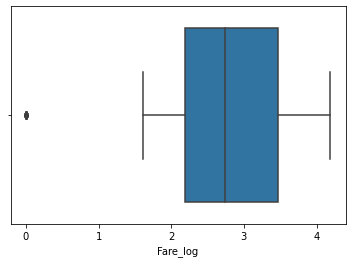

In [361]:
sns.boxplot(x=df.Fare_log) ##This will be handled when I perform standard scaler

In [362]:
df.Fare_log.median()

2.737880811060884

In [364]:
np.log1p(df.Fare.median())

2.737880811060884

## Perform Encoding

In [367]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Fare_log
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,8.5167,C,0,2.253048
658,0,2,"Eitemiller, Mr. George Floyd",male,23.00,0,0,13.0000,S,0,2.639057
262,0,1,"Taussig, Mr. Emil",male,52.00,1,1,65.0000,S,1,4.189655
517,0,3,"Ryan, Mr. Patrick",male,29.00,0,0,24.1500,Q,0,3.224858
400,1,3,"Niskanen, Mr. Juha",male,39.00,0,0,7.9250,S,0,2.188856


Handling Sex Column

In [379]:
df['Male'] = np.where(df.Sex=='male',1,0)
df['Female'] = np.where(df.Sex=='female',1,0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Fare_log,Male,Female
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.250,S,0,2.110213,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.000,C,1,4.189655,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.925,S,0,2.188856,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.100,S,1,3.990834,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.050,S,0,2.202765,1,0


Now let's put mean of the values in Embarked

In [385]:
Embarked_dict = df.groupby(by='Embarked')['Embarked'].count().to_dict()
Embarked_dict

{'C': 168, 'Q': 77, 'S': 646}

In [386]:
for key,value in Embarked_dict.items():
    Embarked_dict[key] = round(value/891,4)
Embarked_dict

{'C': 0.1886, 'Q': 0.0864, 'S': 0.725}

In [388]:
df.Embarked = df.Embarked.map(Embarked_dict)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Fare_log,Male,Female
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.250,0.7250,0,2.110213,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,65.000,0.1886,1,4.189655,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.925,0.7250,0,2.188856,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.100,0.7250,1,3.990834,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.050,0.7250,0,2.202765,1,0


Now Let's Handle Sibsp

What I will do is I will check how many different values are there.
Then I will see the one which is more in count, I will provide it more prefrence like here 0: 6 and 5: 0

In [390]:
df.SibSp.value_counts().sort_values(ascending=True)

5      5
8      7
3     16
4     18
2     28
1    209
0    608
Name: SibSp, dtype: int64

In [392]:
SibSp_dict = {}
for i,k in enumerate(df.SibSp.value_counts().sort_values(ascending=True).index, start=0):
    SibSp_dict[k]=i
SibSp_dict

{5: 0, 8: 1, 3: 2, 4: 3, 2: 4, 1: 5, 0: 6}

In [393]:
df.SibSp = df.SibSp.map(SibSp_dict)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Fare_log,Male,Female
0,0,3,"Braund, Mr. Owen Harris",male,22.0,5,0,7.250,0.7250,0,2.110213,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,5,0,65.000,0.1886,1,4.189655,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,6,0,7.925,0.7250,0,2.188856,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,5,0,53.100,0.7250,1,3.990834,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,6,0,8.050,0.7250,0,2.202765,1,0


Similarly I will go for Parch

In [394]:
df.Parch.value_counts().sort_values(ascending=True)

6      1
4      4
5      5
3      5
2     80
1    118
0    678
Name: Parch, dtype: int64

In [396]:
Parch_dict = {}
for i,k in enumerate(df.Parch.value_counts().sort_values(ascending=True).index, start=0):
    Parch_dict[k]=i
Parch_dict

{6: 0, 4: 1, 5: 2, 3: 3, 2: 4, 1: 5, 0: 6}

In [397]:
df.Parch = df.Parch.map(Parch_dict)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,Fare_log,Male,Female
0,0,3,"Braund, Mr. Owen Harris",male,22.0,5,6,7.250,0.7250,0,2.110213,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,5,6,65.000,0.1886,1,4.189655,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,6,6,7.925,0.7250,0,2.188856,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,5,6,53.100,0.7250,1,3.990834,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,6,6,8.050,0.7250,0,2.202765,1,0


In [415]:
df.drop(['Name', 'Sex', 'Fare'], axis=1, inplace=True)

In [434]:
df.isnull().values.any()

False

In [416]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Cabin_new,Fare_log,Male,Female
0,0,3,22.0,5,6,0.7250,0,2.110213,1,0
1,1,1,38.0,5,6,0.1886,1,4.189655,0,1
2,1,3,26.0,6,6,0.7250,0,2.188856,0,1
3,1,1,35.0,5,6,0.7250,1,3.990834,0,1
4,0,3,35.0,6,6,0.7250,0,2.202765,1,0


## Train Test Split

In [424]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

## Feature Selection

In [435]:
f_p_values = chi2(X_train, y_train)

In [436]:
f_p_values

(array([1.86716672e+01, 2.43799417e-03, 6.01020888e-01, 2.04874021e-01,
        1.70864432e+00, 3.88822013e+01, 1.07778683e+01, 6.40154778e+01,
        1.12451968e+02]),
 array([1.55272667e-05, 9.60619615e-01, 4.38188776e-01, 6.50815110e-01,
        1.91161358e-01, 4.50166433e-10, 1.02720912e-03, 1.23445567e-15,
        2.84473809e-26]))

1st array represent f value ----> Higher f value, higher is it's importance

2nd array represent p value ----> Lesser p value, more is it's importance

In [437]:
p_values = pd.Series(f_p_values[1])

In [439]:
p_values.index = X_train.columns

In [441]:
p_values

Pclass       1.552727e-05
Age          9.606196e-01
SibSp        4.381888e-01
Parch        6.508151e-01
Embarked     1.911614e-01
Cabin_new    4.501664e-10
Fare_log     1.027209e-03
Male         1.234456e-15
Female       2.844738e-26
dtype: float64

In [443]:
p_values.sort_values(ascending=True)

Female       2.844738e-26
Male         1.234456e-15
Cabin_new    4.501664e-10
Pclass       1.552727e-05
Fare_log     1.027209e-03
Embarked     1.911614e-01
SibSp        4.381888e-01
Parch        6.508151e-01
Age          9.606196e-01
dtype: float64

##### Hence we can see the important features.

## Perform Standard Scaling

In [448]:
scaler = StandardScaler()

In [450]:
X_train_scaled = scaler.fit_transform(X_train)

In [451]:
X_test_scaled = scaler.transform(X_test)

## Model Building

#### Logistics Regression

In [457]:
logistic = LogisticRegression()

In [458]:
logistic.fit(X_train, y_train)

/Users/gautam/Desktop/ML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [460]:
pred_y = logistic.predict(X_test)

In [461]:
pred_y

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1])

In [463]:
accuracy_score(pred_y, y_test)

0.8022388059701493

In [484]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.73      0.70      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



<AxesSubplot:>

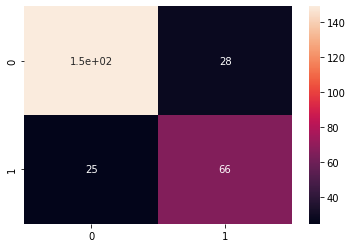

In [473]:
sns.heatmap(confusion_matrix(pred_y, y_test), annot=True)

In [464]:
logistic_scaled = LogisticRegression()

In [465]:
logistic_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [466]:
pred_y_scaled = logistic_scaled.predict(X_test_scaled)

In [467]:
pred_y_scaled

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1])

In [471]:
accuracy_score(pred_y_scaled, y_test)

0.8022388059701493

In [485]:
print(classification_report(y_test, pred_y_scaled))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.73      0.70      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



<AxesSubplot:>

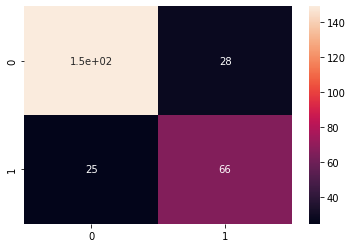

In [474]:
sns.heatmap(confusion_matrix(pred_y_scaled, y_test), annot=True)

#### RandomForest

In [475]:
rfc = RandomForestClassifier()

In [476]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [477]:
pred_y_rfc = rfc.predict(X_test)

In [478]:
accuracy_score(pred_y_rfc, y_test)

0.8171641791044776

<AxesSubplot:>

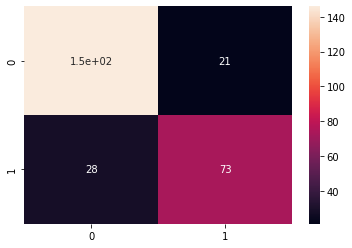

In [480]:
sns.heatmap(confusion_matrix(pred_y_rfc, y_test), annot=True)

In [483]:
print(classification_report(y_test, pred_y_rfc))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       174
           1       0.72      0.78      0.75        94

    accuracy                           0.82       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.82      0.82       268

